In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import pandas as pd

# Loading the collected Amazon purchase data
df = pd.read_csv('Dataset.csv', encoding='latin1')

df.head()


,Order ID,Order Date,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Ship Date,State,City,Pin,Product Name,Age,Gender
0,404-9716970-4956325,2024-08-17T18:02:42Z,253.38,45.62,0.0,0,299,253.38,45.62,1,2024-08-17T22:45:34Z,maharashtra,pune,412101,"Dell MS116 Wired Optical Mouse, 1000DPI, LED T...",26,M
1,404-0748491-0918719,2024-08-07T06:06:00Z,"1,109.32",199.68,0.0,'-210',"1,099","1,109.32",199.68,1,2024-08-07T23:00:25Z,maharashtra,pune,412101,Popsugar Off Roader Rechargeable Remote Contro...,26,M
2,404-4107320-2700354,2024-08-07T03:42:08Z,266.96,32.04,0.0,0,299,266.96,32.04,1,2024-08-07T10:39:54Z,maharashtra,pune,412101,Nerf Alpha Strike Claw Qs-4 Blaster 4 Official...,26,M
3,171-7403358-0050760,2024-08-06T19:11:42Z,293.74,35.26,0.0,0,329,293.74,35.26,1,2024-08-07T11:27:19Z,maharashtra,pune,412101,Misamo Enterprise Lunch Bag for Women & Men Ad...,26,M
4,404-4987507-1324308,2024-08-02T03:25:56Z,"1,948.30",350.7,0.0,0,"2,299","1,948.30",350.7,1,2024-08-02T06:43:25Z,maharashtra,pune,412101,TP-Link | AC1200 WiFi Range Extender | Up to 1...,26,M


In [56]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Unit Price,0
Unit Price Tax,0
Shipping Charge,0
Total Discounts,0
Total Owed,0
Shipment Item Subtotal,0
Shipment Item Subtotal Tax,515
Quantity,0


In [59]:
df.iloc[:, 8] = df.iloc[:,8].fillna(df.iloc[:,3])

df.isnull().sum()

,0
Order ID,0
Order Date,0
Unit Price,0
Unit Price Tax,0
Shipping Charge,0
Total Discounts,0
Total Owed,0
Shipment Item Subtotal,0
Shipment Item Subtotal Tax,0
Quantity,0


In [60]:
# Finding the number of unique customers

df['Customer ID'] = 1

for i in range(1, len(df)):
  if df.loc[i, 'Order Date'] > df.loc[i-1, 'Order Date']:
    df.loc[i, 'Customer ID'] = df.loc[i-1, 'Customer ID'] + 1
  else:
    df.loc[i, 'Customer ID'] = df.loc[i-1, 'Customer ID']

df['Customer ID'].tail()

,Customer ID
7860,129
7861,129
7862,129
7863,129
7864,129


In [61]:
def refine_categorize_product(product_name):
    product_name = str(product_name).lower()

    # Refined keywords for each category
    if any(keyword in product_name for keyword in ['dress','crocs','bangle','pant','men','cardigan','sneaker','shoelaces','denim','beauty','attar','sandal','tresemme','sunglasses','women','cotton','jewellery','saree','sundress','inner','puma','jockey','tote','shoe','cotton' ,'skirt', 'pants', 'wear', 'shirt', 'clothing', 'baby wear', 'jeans','apparel', 'jacket', 'top', 'fashion', 'fancy']):
        return 'Fashion'
    elif any(keyword in product_name for keyword in ['popcorn','himalaya','burger','candies','del','bingo','parle','pizza','cookies','mustard','sauce','biscuit','sweetener','maybelline','chai','mars','rocher','concealer','chicken','nuts','dal','haldiram','maggi','tata','oil','garnier','huggies','cough','tooth','candy','pimple','tan','poha','sooji','corn flakes','kellogs','fibre','fresh','lakme','eyeliner','vega','santoor','pencil','apricots','drink','oil','dabur','cloves','hing','maida','pasta','amul','body','seeds','sugar','honey','natural','spray','cosmetics','pouch','gel','tablets','lip','powder','nivia','hand','capsules','tape','shampoo','wash','almonds','conditioner','spf','medicines','diaper','eyelid','creme','cream', 'ketchup','food','jar','ghee','kg', 'pet', 'baby', 'cleaning', 'hygiene', 'dog food', 'sanitary', 'tissue', 'soap', 'detergent', 'toothpaste']):
        return 'Daily Essentials'
    elif any(keyword in product_name for keyword in ['colgate','mask','zippo','garbage','badminton','starmix','umbrella','doll','cricket','guitar','microwave','desk','scotchbrite','gift','dog','rakhi','surf','tools','strength','coffee','ball','curtain','sports','pillow','clay','dining','sheets','container','action figure','lantern','hammock','design','hoop','sofa','mirror','bottle','painting','sewing','dustbin','grinder','bean bag','tennis','cleaner','yonex','oregano','puzzle','pot','cutter','pigeon','swimming','raincoat','rain','soft','mattress','helmet','mosquito','camphor','bucket','basket','backpack','active','chloride','holder','lock','furniture','stainless','steel' ,'home', 'kitchen', 'garden', 'outdoor', 'decor', 'cookware', 'utensil', 'car', 'interior', 'fragrance', 'air freshener']):
        return 'Home, Kitchen and Outdoors'
    elif any(keyword in product_name for keyword in ['lenovo','car','3m','mi','ps3','oneplus','suzuki','virus','heater','supplement','lamp','massager','trimmer','philips','car','bajaj','pen','godrej','panasonic','arduino','apple','highlighter','camlin','case','cover','wipro','motor','robot','electronic','syska','ram','storage','samsung','ipad','fan','watts','frame','calculator','phone','mah','batteries','wireless','wire','toaster','nonstick','gadget', 'electronics', 'appliance', 'laptop', 'charger','usb', 'accessory', 'battery', 'speaker', 'camera', 'tv', 'earphones', 'maker','cable']):
        return 'Electronics, Appliances and Accessories'
    elif any(keyword in product_name for keyword in ['mechanics','course','death','sweet talk','forge','mercy','ikigai','principles','calculus','oxford','attack','metamorphosis','orwell','ghibli','handbook','IIT','ability','objective','knowledge','product management','prep','psychology','my experiments with truth','digital','science','class','atomic habits','it ends with us','edition','hardcover','gate','cat','engineering','jee','lust','book','paperback', 'novel','Exam','question','art','Previous year', 'games', 'entertainment', 'music', 'movie', 'film', 'audio']):
        return 'Books and Entertainment'
    else:
        return 'Unknown'

# Apply the refined categorization logic to the product names
df['Category'] = df['Product Name'].apply(refine_categorize_product)

# Save the refined result to a new CSV file
output_file_refined_path = 'product_categories_refined_output.csv'
df.to_csv(output_file_refined_path, index=False)

# Display the updated dataframe
df.Category.value_counts()


,count
Category,
Daily Essentials,2859
Fashion,2244
"Home, Kitchen and Outdoors",877
"Electronics, Appliances and Accessories",828
Unknown,611
Books and Entertainment,446


In [62]:
df_unknown = df[df['Category'] == 'Unknown']

In [63]:
df_unknown['Product Name']

,Product Name
26,Sapiens (L)
50,1984
51,Animal Farm
52,The Origin of Species
66,TP-Link TL-WA855RE 300 Mbps Wi-Fi Range Extend...
...,...
7801,Go Desi Peanut Chikki Bar | No Added Preservat...
7803,Amazon Pay Wallet
7804,Amazon Pay Wallet
7806,Scotch-Brite Silver Sparks Scrub Pad 2.75x4 (P...


In [64]:
df.loc[df['Category'] == 'Unknown', 'Category'] = 'Books and Entertainment'

In [65]:
df.head()

,Order ID,Order Date,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,Quantity,Ship Date,State,City,Pin,Product Name,Age,Gender,Customer ID,Category
0,404-9716970-4956325,2024-08-17T18:02:42Z,253.38,45.62,0.0,0,299,253.38,45.62,1,2024-08-17T22:45:34Z,maharashtra,pune,412101,"Dell MS116 Wired Optical Mouse, 1000DPI, LED T...",26,M,1,Daily Essentials
1,404-0748491-0918719,2024-08-07T06:06:00Z,"1,109.32",199.68,0.0,'-210',"1,099","1,109.32",199.68,1,2024-08-07T23:00:25Z,maharashtra,pune,412101,Popsugar Off Roader Rechargeable Remote Contro...,26,M,1,Daily Essentials
2,404-4107320-2700354,2024-08-07T03:42:08Z,266.96,32.04,0.0,0,299,266.96,32.04,1,2024-08-07T10:39:54Z,maharashtra,pune,412101,Nerf Alpha Strike Claw Qs-4 Blaster 4 Official...,26,M,1,Books and Entertainment
3,171-7403358-0050760,2024-08-06T19:11:42Z,293.74,35.26,0.0,0,329,293.74,35.26,1,2024-08-07T11:27:19Z,maharashtra,pune,412101,Misamo Enterprise Lunch Bag for Women & Men Ad...,26,M,1,Fashion
4,404-4987507-1324308,2024-08-02T03:25:56Z,"1,948.30",350.7,0.0,0,"2,299","1,948.30",350.7,1,2024-08-02T06:43:25Z,maharashtra,pune,412101,TP-Link | AC1200 WiFi Range Extender | Up to 1...,26,M,1,"Electronics, Appliances and Accessories"


<Axes: xlabel='Category'>

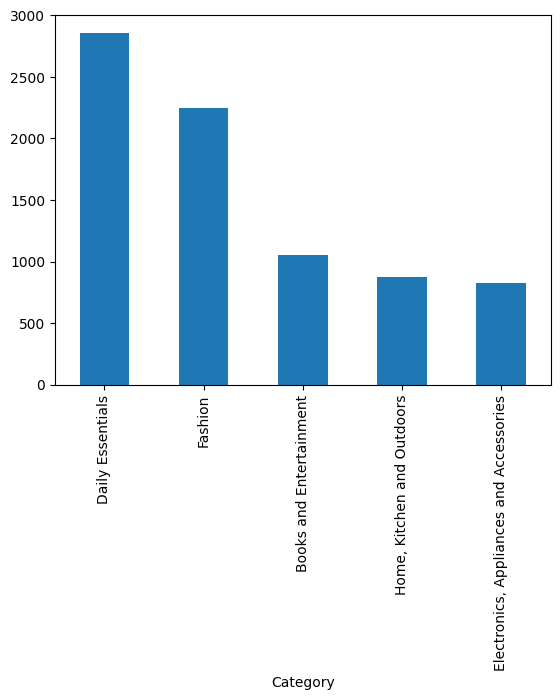

In [66]:
df['Category'].value_counts().plot(kind = 'bar')

In [107]:
price_stats = df.groupby('Category')['Unit Price'].describe()
price_stats


,count,unique,top,freq
Category,,,,
Books and Entertainment,1057,618,48,17
Daily Essentials,2859,1461,0,41
"Electronics, Appliances and Accessories",828,491,338.14,30
Fashion,2244,1178,0,49
"Home, Kitchen and Outdoors",877,582,168.64,18


In [84]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df['Total Owed'].quantile(0.25)
    Q3 = df['Total Owed'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    return df[(df['Total Owed'] >= lower_bound) & (df['Total Owed'] <= upper_bound)]

# Apply the outlier removal function for each category
# cleaned_df = df.groupby('Category').apply(remove_outliers_iqr).reset_index(drop=True)
cleaned_df = df
# Display the shape of the original and cleaned DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_df.shape}")


Original DataFrame shape: (7865, 20)
Cleaned DataFrame shape: (7865, 20)


In [85]:
cleaned_price_stats = cleaned_df.groupby('Category')['Unit Price'].describe()
cleaned_price_stats

,count,unique,top,freq
Category,,,,
Books and Entertainment,1057,618,48,17
Daily Essentials,2859,1461,0,41
"Electronics, Appliances and Accessories",828,491,338.14,30
Fashion,2244,1178,0,49
"Home, Kitchen and Outdoors",877,582,168.64,18


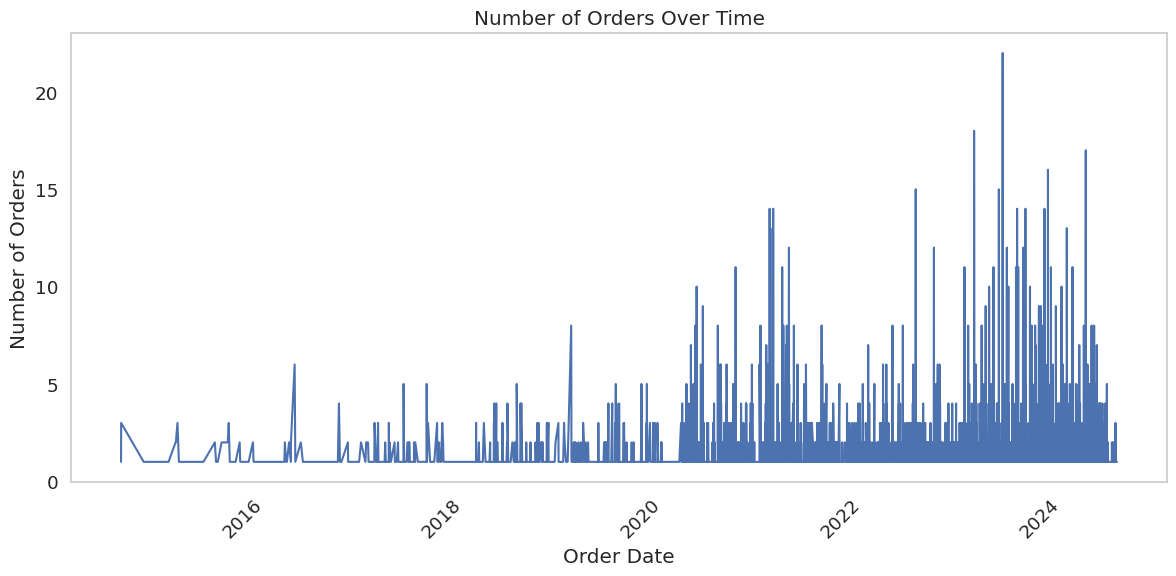

In [87]:
# Group by Order Date and count the number of orders
order_counts = cleaned_df.groupby('Order Date').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(order_counts.index, order_counts.values, linestyle='-')
plt.title('Number of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

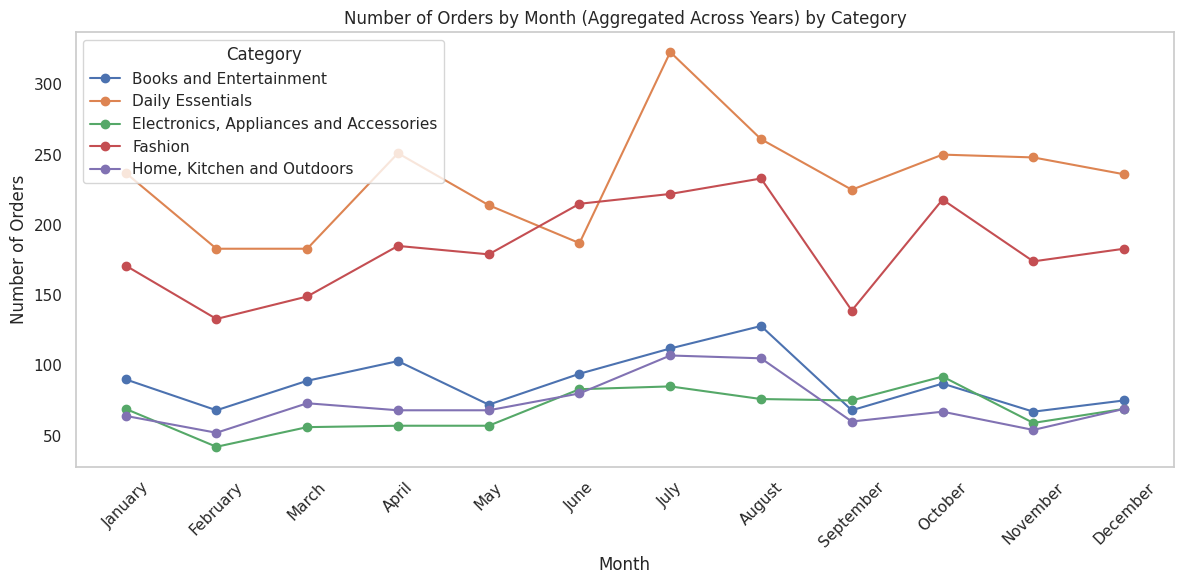

In [76]:
# Create a new column for Month
cleaned_df['Month'] = cleaned_df['Order Date'].dt.month_name()

# Group by Month and Category, then count the number of orders
order_counts = cleaned_df.groupby(['Month', 'Category']).size().unstack(fill_value=0)

# Reindex the DataFrame to ensure months are in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
order_counts = order_counts.reindex(month_order)

# Create a time series plot for all categories grouped by month
plt.figure(figsize=(12, 6))

# Plot each category
for category in order_counts.columns:
    plt.plot(order_counts.index, order_counts[category], marker='o', label=category)

plt.title('Number of Orders by Month (Aggregated Across Years) by Category')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Category')
plt.tight_layout()
plt.show()

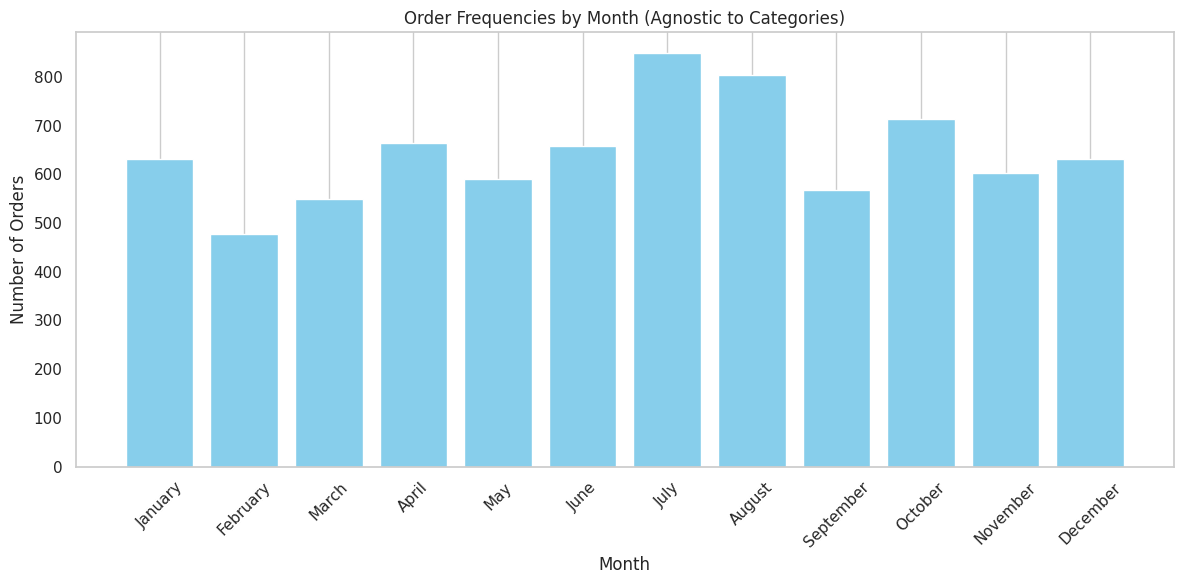

In [77]:

# Create a new column for Month
cleaned_df['Month'] = cleaned_df['Order Date'].dt.month_name()

# Group by Month and count the total number of orders
monthly_counts = cleaned_df['Month'].value_counts().reindex(
    ["January", "February", "March", "April", "May", "June",
     "July", "August", "September", "October", "November", "December"],
    fill_value=0)

# Create a histogram for order frequencies by month
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
plt.title('Order Frequencies by Month (Agnostic to Categories)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [92]:
age_demographics = cleaned_df.groupby('Gender')['Age'].mean()
age_demographics

,Age
Gender,
F,24.789157
M,25.200505


In [98]:
# Now perform the aggregation
# Convert 'Total Owed' and 'Total Discounts' to numeric, handling errors
# Ensure 'Total Owed' is treated as a string before applying string methods
df['Total Owed'] = pd.to_numeric(df['Total Owed'].astype(str).str.replace(',', '').str.replace('-', ''), errors='coerce')
df['Total Discounts'] = pd.to_numeric(df['Total Discounts'].astype(str).str.replace(',', '').str.replace('-', ''), errors='coerce')


gender_agg = df.groupby('Gender').agg({
    'Total Owed': 'sum',          # Total order value per gender
    'Order ID': 'count',          # Total order count per gender
    'Total Discounts': 'mean',    # Average discount per order per gender
    'Quantity': 'mean'            # Average quantity per order per gender
}).rename(columns={'Order ID': 'Total Order Count'}).reset_index()

print(gender_agg)
# Example: Age Group Analysis
age_bins = [0, 17, 24, 34, 44, 54, 64, 100]  # Define age ranges
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
cleaned_df['Age Group'] = pd.cut(cleaned_df['Age'], bins=age_bins, labels=age_labels)

age_agg = cleaned_df.groupby('Age Group').agg({
    'Total Owed': 'sum',
    'Order ID': 'count',
    'Total Discounts': 'mean',
    'Quantity': 'mean'
}).rename(columns={'Order ID': 'Total Order Count'}).reset_index()

  Gender  Total Owed  Total Order Count  Total Discounts  Quantity
0      F  1609316.87               2324         0.066259  1.108434
1      M  6850114.97               5541         0.026935  1.071106


<ipython-input-98-ea7f6e9e07e4>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_agg = cleaned_df.groupby('Age Group').agg({


In [96]:
from scipy.stats import ttest_ind

df['Total Owed'] = pd.to_numeric(df['Total Owed'].str.replace(',', ''), errors='coerce')

# Filter data by gender
male_orders = df[df['Gender'] == 'M']['Total Owed']
female_orders = df[df['Gender'] == 'F']['Total Owed']

# Welch's t-test for Total Owed between genders
t_stat, p_val = ttest_ind(male_orders, female_orders, equal_var=False)
print(f"Welch's t-test: t-statistic = {t_stat}, p-value = {p_val}")


Welch's t-test: t-statistic = 6.519460505479551, p-value = 7.551319131340045e-11


In [99]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a crosstab for Mode of Payment and Gender
payment_gender_crosstab = pd.crosstab(df['Quantity'], df['Gender'])

# Chi-square test of independence
chi2, p, dof, ex = chi2_contingency(payment_gender_crosstab)
print(f"Chi-square test: chi2 = {chi2}, p-value = {p}")

Chi-square test: chi2 = 34.21384992991178, p-value = 3.715698986171419e-05


In [100]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation for Age and Total Owed
corr, p_val = pearsonr(df['Age'], df['Total Owed'])
print(f"Pearson's correlation: correlation = {corr}, p-value = {p_val}")


Pearson's correlation: correlation = 0.03472220122249925, p-value = 0.0020715921301148726


In [101]:
from statsmodels.stats.power import TTestIndPower

# Assuming medium effect size of 0.5, alpha level of 0.05, and sample size based on gender
power_analysis = TTestIndPower()
effect_size = 0.5
alpha = 0.05
sample_size = len(male_orders)  # or a similar count

# Calculate power
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, alternative='two-sided')
print(f"Power of the t-test: {power}")


Power of the t-test: 1.0


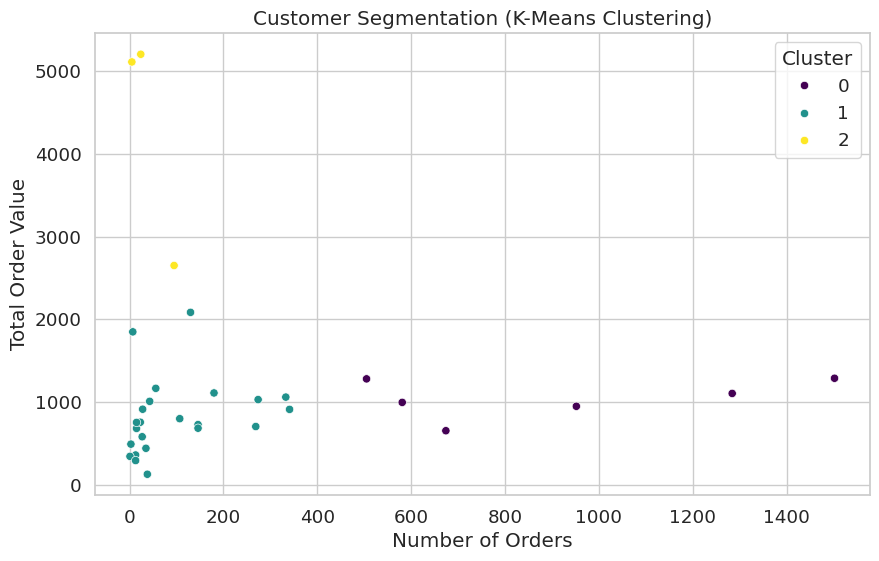

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer (Assuming 'Customer ID' is available)
customer_data = df.groupby('Age').agg({
    'Order ID': 'count',  # Number of orders
    'Total Owed': 'sum',  # Total order value
    'Total Owed': lambda x: x.sum() / x.count()  # Average order value
}).reset_index()

# Normalize the data before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Order ID', 'Total Owed', 'Total Owed']])

# Fit K-Means clustering (adjust number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Order ID', y='Total Owed', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Number of Orders')
plt.ylabel('Total Order Value')
plt.show()


In [103]:
from scipy.stats import chi2_contingency

gender_cluster_crosstab = pd.crosstab(customer_data['Cluster'], df['Gender'])
chi2, p_value, _, _ = chi2_contingency(gender_cluster_crosstab)
print(f"Chi-square result: chi2 = {chi2}, p-value = {p_value}")


Chi-square result: chi2 = 0.0, p-value = 1.0
